# Zvi Badash 214553034
### Question 1 - Discrete Distribution Tensor Sampler

As instructed, I recorded a video of myself explaining the exercise and the code I wrote for it.
The video unfortunately has a watermark, but I hope it won't be in the way of understanding the code.

[Exercise 12 - My Sampler](https://youtu.be/VHfUC44Y9ek)


## Imports and type aliases

In [1]:
from typing import List, Tuple

import torch
import matplotlib.pyplot as plt

In [2]:
Size = torch.Size
Tensor = torch.Tensor

## Implementation

In [3]:
def valid_dist(dist: List[float]) -> bool:
    positive = all(p > 0 for p in dist)
    sum_to_1 = abs(sum(dist) - 1.) < 1e-5
    return sum_to_1 and positive

In [4]:
def my_sampler(size: Tuple[int, ...], dist: List[float], requires_grad: bool=False) -> Tensor:
    """
    Samples a tensor of size `size` from the discrete distribution over [0, len(dist)] with probabilities `dist`.
    :param size: The size of the tensor to sample
    :param dist: The distribution to sample from
    :param requires_grad: Same as `requires_grad` in torch's implementation
    :return:
    """
    if not valid_dist(dist): # Check that the distribution is indeed valid
        raise RuntimeError('Distribution must have sum 1 and have all strictly positive probabilities')

    U = torch.rand(size) # Sample from uniform distribution, as per the sampling algorithm
    cum_dist = torch.tensor(dist).cumsum(dim=0) # Compute the cumulative distribution of `dist`

    with torch.no_grad(): # We don't need to compute gradients for this operation
        sampled = torch.zeros_like(U, requires_grad=requires_grad) # Initialize the sampled tensor
        for i, p in enumerate(cum_dist):
            sampled[U >= p] = i + 1 # Assign the newly sampled value to some elements of `sampled`
    return sampled

## Test the sampler

In [5]:
# A basic test to check that the sampling works
A = my_sampler((2, 3, 4), [0.1, 0.2, 0.7])
A, A.requires_grad

(tensor([[[2., 2., 2., 2.],
          [1., 2., 2., 2.],
          [0., 0., 2., 2.]],
 
         [[2., 2., 0., 2.],
          [2., 2., 0., 2.],
          [2., 2., 0., 1.]]]),
 False)

<BarContainer object of 3 artists>

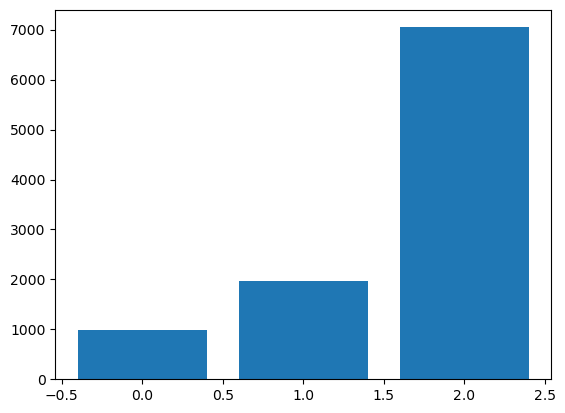

In [6]:
# Check that the distribution is indeed correct
B = my_sampler((10_000,), [0.1, 0.2, 0.7])
plt.bar(*torch.unique(B, return_counts=True))

In [7]:
# Use the test from the question
C = my_sampler((2, 8), [0.1, 0.2, 0.7], requires_grad=True)
C, C.grad

(tensor([[2., 0., 2., 2., 2., 0., 2., 2.],
         [2., 0., 0., 1., 0., 2., 2., 2.]], requires_grad=True),
 None)